In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import os
import csv

In [2]:
data = pd.read_csv("variant_surveillance.tsv", sep = '\t',dtype = {'Variant': 'string',
                                                                 'Is reference?': 'string',
                                                                 'Is complete?': 'string'})
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [3]:
data['Variant'].unique()

<StringArray>
['VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa',
                              'VOC Delta GK (B.1.617.2+AY.*) first detected in India',
                               'VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK',
                                                                                 <NA>,
          'VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California',
                         'VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru',
                       'VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York',
   'VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa',
                            'VOI Kappa G/452R.V3 (B.1.617.1) first detected in India',
                           'VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia',
                    'VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan',
                           'V

In [4]:
data = data[data['Clade'].notna()]
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [5]:
 #specify strings for countries 

# europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
#               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']

%time
europe_list = ["Europe", "North America","Oceania", "Asia","South America", "Africa"]
              
for i in europe_list:
    
    data.loc[data['Location'].str.contains(i), 'Location'] = i


#data.loc[data['Location'].str.contains('Turkey'), 'Location'] = 'Turkey'

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 27.2 µs


In [6]:
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [7]:
df = data[['Clade', 'Location','Collection date']]
df.head()

,Clade,Location,Collection date
0,GRA,Oceania,2022-01-25
1,GRA,Oceania,2022-01-25
2,GRA,Oceania,2022-01-25
3,GK,Europe,2021-08-18
4,GRA,Europe,2022-01-17


In [8]:
df['Collection date'] = pd.to_datetime(df["Collection date"])
df.head()

,Clade,Location,Collection date
0,GRA,Oceania,2022-01-25
1,GRA,Oceania,2022-01-25
2,GRA,Oceania,2022-01-25
3,GK,Europe,2021-08-18
4,GRA,Europe,2022-01-17


In [9]:
df['Date']= df['Collection date'].dt.to_period('W')
df.head()

,Clade,Location,Collection date,Date
0,GRA,Oceania,2022-01-25,2022-01-24/2022-01-30
1,GRA,Oceania,2022-01-25,2022-01-24/2022-01-30
2,GRA,Oceania,2022-01-25,2022-01-24/2022-01-30
3,GK,Europe,2021-08-18,2021-08-16/2021-08-22
4,GRA,Europe,2022-01-17,2022-01-17/2022-01-23


In [10]:
df_weekly = df[(df['Collection date'] >= '2020-01-01') & (df['Collection date'] <='2022-05-31')].groupby(['Clade','Location', 'Date']).size().reset_index()
df_weekly.head()

,Clade,Location,Date,0
0,G,Africa,2019-12-30/2020-01-05,64
1,G,Africa,2020-01-27/2020-02-02,5
2,G,Africa,2020-02-24/2020-03-01,9
3,G,Africa,2020-03-02/2020-03-08,6
4,G,Africa,2020-03-09/2020-03-15,20


In [11]:
df_weekly['Date'] = df_weekly['Date'].astype(str)
df_weekly.head()

,Clade,Location,Date,0
0,G,Africa,2019-12-30/2020-01-05,64
1,G,Africa,2020-01-27/2020-02-02,5
2,G,Africa,2020-02-24/2020-03-01,9
3,G,Africa,2020-03-02/2020-03-08,6
4,G,Africa,2020-03-09/2020-03-15,20


In [12]:
df_weekly.columns = ['Clade','Location','Date','Freq']
df_weekly.head()

,Clade,Location,Date,Freq
0,G,Africa,2019-12-30/2020-01-05,64
1,G,Africa,2020-01-27/2020-02-02,5
2,G,Africa,2020-02-24/2020-03-01,9
3,G,Africa,2020-03-02/2020-03-08,6
4,G,Africa,2020-03-09/2020-03-15,20


In [13]:
tmp = df_weekly['Date'].str.split(pat = '/', expand = True)
tmp.head()

,0,1
0,2019-12-30,2020-01-05
1,2020-01-27,2020-02-02
2,2020-02-24,2020-03-01
3,2020-03-02,2020-03-08
4,2020-03-09,2020-03-15


In [14]:
df_weekly2 = pd.merge(df_weekly, tmp.iloc[: , 0], left_index= True, right_index= True)
df_weekly2.head()

,Clade,Location,Date,Freq,0
0,G,Africa,2019-12-30/2020-01-05,64,2019-12-30
1,G,Africa,2020-01-27/2020-02-02,5,2020-01-27
2,G,Africa,2020-02-24/2020-03-01,9,2020-02-24
3,G,Africa,2020-03-02/2020-03-08,6,2020-03-02
4,G,Africa,2020-03-09/2020-03-15,20,2020-03-09


In [15]:
df_weekly2.Clade.unique()

array(['G', 'GH', 'GK', 'GKA', 'GR', 'GRA', 'GRY', 'GV', 'L', 'O', 'S',
       'V'], dtype=object)

In [16]:
df_weekly2.columns = ['Clade', 'Location', 'WY-str', 'Freq', 'Date']
df_weekly2.head()

,Clade,Location,WY-str,Freq,Date
0,G,Africa,2019-12-30/2020-01-05,64,2019-12-30
1,G,Africa,2020-01-27/2020-02-02,5,2020-01-27
2,G,Africa,2020-02-24/2020-03-01,9,2020-02-24
3,G,Africa,2020-03-02/2020-03-08,6,2020-03-02
4,G,Africa,2020-03-09/2020-03-15,20,2020-03-09


In [17]:
df_weekly2['Date'] = pd.to_datetime(df_weekly2['Date'])
df_weekly2.head()

,Clade,Location,WY-str,Freq,Date
0,G,Africa,2019-12-30/2020-01-05,64,2019-12-30
1,G,Africa,2020-01-27/2020-02-02,5,2020-01-27
2,G,Africa,2020-02-24/2020-03-01,9,2020-02-24
3,G,Africa,2020-03-02/2020-03-08,6,2020-03-02
4,G,Africa,2020-03-09/2020-03-15,20,2020-03-09


In [18]:
df_weekly2.sort_values(by = 'Date')
df_weekly2.head()

,Clade,Location,WY-str,Freq,Date
0,G,Africa,2019-12-30/2020-01-05,64,2019-12-30
1,G,Africa,2020-01-27/2020-02-02,5,2020-01-27
2,G,Africa,2020-02-24/2020-03-01,9,2020-02-24
3,G,Africa,2020-03-02/2020-03-08,6,2020-03-02
4,G,Africa,2020-03-09/2020-03-15,20,2020-03-09


In [19]:
#claculate weekly sums

df_weekly_sum = df_weekly.groupby(['Clade', 'Date', 'Location'], as_index= False)['Freq'].sum()
df_weekly_sum.head()

,Clade,Date,Location,Freq
0,G,2019-12-30/2020-01-05,Africa,64
1,G,2019-12-30/2020-01-05,Asia,110
2,G,2019-12-30/2020-01-05,Europe,593
3,G,2019-12-30/2020-01-05,North America,58
4,G,2019-12-30/2020-01-05,Oceania,75


In [20]:
df_weekly_sum.shape

(5148, 4)

In [21]:
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'G']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'GV']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'L']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'O']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'S']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'V']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Clade'] != 'GKA']

df_weekly_sum.head(), df_weekly_sum['Clade'].unique()

(    Clade                   Date       Location  Freq
 716    GH  2019-12-30/2020-01-05         Africa    24
 717    GH  2019-12-30/2020-01-05           Asia    98
 718    GH  2019-12-30/2020-01-05         Europe   580
 719    GH  2019-12-30/2020-01-05  North America   460
 720    GH  2019-12-30/2020-01-05        Oceania    56,
 array(['GH', 'GK', 'GR', 'GRA', 'GRY'], dtype=object))

In [22]:
# #clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
# #change clade input to whichever you want to analyze
# clades = ['G','GH','GK','GR','GRA','GRY','GV','L','O','S','V']
# VOC = ['GH','GK','GR','GRA','GRY']

# clade_input = VOC    ####

# #function to generate distance matrix based on quarter, year, and continent
# def create_distance_matrix(df,quarter_continent):
#     tmp = df['Clade'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
#     distance_matrix = pd.DataFrame(index = clade_list)
#     distance_matrix[clade_list] = np.nan
#     #fill in distance matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 distance_matrix.loc[i,j] = 0
#             else:
#                 distance_matrix.loc[i,j] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 distance_matrix.loc[j,i] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     return distance_matrix

# #function to generate difference matrix based on quarter, year, and continent
# def create_difference_matrix(df,quarter_continent):
#     tmp = df['Clade'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
#     difference_matrix = pd.DataFrame(index = clade_list)
#     difference_matrix[clade_list] = np.nan
#     #fill in difference matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 difference_matrix.loc[i,j] = 0
#             else:
#                 difference_matrix.loc[i,j] = (abs((df.loc[df['Clade'] == '{a} vs b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 difference_matrix.loc[j,i] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     #if row_vs_col is a negative value, make it negative in difference matrix
#     for i,v in difference_matrix.iterrows():
#         for j in difference_matrix:
#             if i != j:
#                 if (df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
#                     difference_matrix.loc[i,j] *= -1
#     return difference_matrix

# #function to calculate the log transformed ratio of two clades
# def transform_ratio(clade_1, clade_2):
#     return np.log10(clade_1/clade_2)

# def time_frame(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
#     for i in dataframe.columns.tolist():
#         if dataframe[i].isnull().all():
#             dataframe = dataframe.drop(i, axis=1)
#     return dataframe

# def time_frame_no_cumsum(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

# #function returns slope of clade advantage plots
# def slope_calc(day, pairwise_fitness):
#     par = np.polyfit(day, pairwise_fitness, 1, full = True)
#     slope= par[0][0]
#     return slope

# def clade_comparisons(df):
#     clade_list = [i for i in clade_input if i in df.columns.tolist()]
#     df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
#     df['days'] = df['date_ordinal'] - 737425
#     #calculate log ratio for each clade comparison
#     for i in clade_list:
#         for j in clade_list:
#             if i != j:
#                 df['{a} vs {b}'.format(a=i,b=j)] = df.apply(lambda row : 
#                                                                         transform_ratio(row['{a}'.format(a=i)],
#                                                                                         row['{b}'.format(b=j)]),
#                                                                                         axis = 1)
#     clade_list.append('date_ordinal')
#     df = df.drop(clade_list, axis=1)
#     return df

In [23]:
#clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
#change clade input to whichever you want to analyze
clades = ['G','GH','GK','GR','GRA','GRY','GV','L','O','S','V']
VOC = ['GH','GK','GR','GRA','GRY']

clade_input = VOC    ####

#function to generate distance matrix based on quarter, year, and continent
def create_distance_matrix(df,quarter_continent):
    tmp = df['Clade'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    distance_matrix = pd.DataFrame(index = clade_list)
    distance_matrix[clade_list] = np.nan
    #fill in distance matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                distance_matrix.loc[i,j] = 0
            else:
                distance_matrix.loc[i,j] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                distance_matrix.loc[j,i] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    return distance_matrix

#function to generate difference matrix based on quarter, year, and continent
def create_difference_matrix(df,quarter_continent):
    tmp = df['Clade'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    difference_matrix = pd.DataFrame(index = clade_list)
    difference_matrix[clade_list] = np.nan
    #fill in difference matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                difference_matrix.loc[i,j] = 0
            else:
                difference_matrix.loc[i,j] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                difference_matrix.loc[j,i] = (abs((df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    #if row_vs_col is a negative value, make it negative in difference matrix
    for i,v in difference_matrix.iterrows():
        for j in difference_matrix:
            if i != j:
                if (df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
                    difference_matrix.loc[i,j] *= -1
    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(clade_1, clade_2):
    return np.log10(clade_1/clade_2)

def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
    for i in dataframe.columns.tolist():
        if dataframe[i].isnull().all():
            dataframe = dataframe.drop(i, axis=1)
    return dataframe


# def time_frame_no_cumsum(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    return dataframe

#function returns slope of clade advantage plots
def slope_calc(day, pairwise_fitness):
    par = np.polyfit(day, pairwise_fitness, 1, full = True)
    slope= par[0][0]
    return slope

def clade_comparisons(df):
    clade_list = [i for i in clade_input if i in df.columns.tolist()]
    df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
    df['days'] = df['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in clade_list:
        for j in clade_list:
            if i != j:
                df['{a} vs {b}'.format(a=i,b=j)] = df.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    clade_list.append('date_ordinal')
    df = df.drop(clade_list, axis=1)
    return df

In [24]:
df_weekly_sum.head()

,Clade,Date,Location,Freq
716,GH,2019-12-30/2020-01-05,Africa,24
717,GH,2019-12-30/2020-01-05,Asia,98
718,GH,2019-12-30/2020-01-05,Europe,580
719,GH,2019-12-30/2020-01-05,North America,460
720,GH,2019-12-30/2020-01-05,Oceania,56


In [25]:
# Export the DataFrame to a CSV file
df_weekly_sum.to_csv('dpgr_gisaid_continents.csv', index=False)

In [26]:
# This function finds the distance matrix among all the clades 

def automation_mine(country, dataset, start, end):
    
    df_weekly = dataset[dataset['Location'] == country]
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Clade', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
    print(f"df_weekly : \n {df_weekly.head}")
    print(f"df_weekly : \n {df_weekly.columns}")
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly, start, end)
    # df_sum.to_csv(country+"df_sum"+r'.csv')
#     print(df_sum)
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
    print(df_)
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
    print(f"df_ :\n {df_}")
    print(f"df_ :\n {df_.columns}")
    

    #calculate slopes, have to disregard nans
    df_slopes = pd.DataFrame()
    cols = df_.columns.to_list()
    df_slopes['Clade'] = cols[3:]
    print(df_slopes['Clade'])
    slopes = []
    for i,v in enumerate(df_.iloc[:,3:]):
        tmp = df_[~df_.iloc[:,i+3].isnull()]
        tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
        print(tmp)
        slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
        #print(len(slopes))
#         print(df_slopes)
    df_slopes['Slope'] = slopes
    # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
    print(df_slopes)

    #define the file path
#     file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance Matrix for Continents/{country + "_dist_mat_who"}.csv'

#     dist_mat = create_distance_matrix(df_slopes,'Slope')
# #     dist_mat.to_csv(file_path, index=True)
#     print(f"distance matrix :\n {dist_mat}")

    #define the file path
#     file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance_matrix_who/{country + "_" + start + "_" + end + "_dist_mat_who_labels"}.csv'

    dist_mat = create_distance_matrix(df_slopes,'Slope')
#     dist_mat.to_csv(file_path, index=True)
    print(f"Diatance matrix: \n {dist_mat}")
    
    dif_mat = create_difference_matrix(df_slopes,'Slope')
    # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
    # print(f"difference matrix :\n {dif_mat}")

    #Plot distance matrix as clustermap
    sns.set(rc = {'figure.figsize':(6, 6)}, font_scale = 1.8)

    #create distance array from distance matrix
    distance_array = ssd.squareform(dist_mat) 

    #create linkage object
    distance_linkage = hierarchy.linkage(distance_array)

    #display clustermap
    g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
                        cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.087, .03, 0.7))                     
    # g.fig.set_size_inches(10, 10)
    # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
    return g

# This `automation_mine()` function generates the distance matrix for `GISAID` labels 

In [27]:
#automation function finds the diatance matrix
# automation_mine('Europe', df_weekly_sum, start = '2021-11', end = '2022-05')

# Scatterplots
*the `scatterplot(country, dataset, start, end, variants)` function generates the `regression plots` for GISAID labels at a target location within a time window, which has a start date and end date in the format ex: 2021-12 *

In [28]:
# This function finds the distance matrix among all the clades 

def scatterplot(country, dataset, start, end, variants):
    
    df_weekly = dataset[dataset['Location'] == country]
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Clade', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly, start, end)
#     df_sum.to_csv(r'df_sum.csv')
#     print(df_sum)
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
#     print(df_)
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
#     print(df_)
 

    #scatterplot of omicron BA.1 lineage fitness
    sns.set_style("white")
    sns.set(rc = {'figure.figsize':(3,3)})
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)
#     pango_compare = [variant] #'Omicron', 'Delta', 'Gamma', 'Beta', 'Alpha'
    marker = ['.', '+', 'v', 'x','*']
    legend=[]
    c=0
    # Create a list to store the slope values and corresponding locations
    slope_values = []

    for i in variants:
        if i != 'GRA': #and i!='Alpha' and i != 'Gamma':# and i!='Delta' and i!='Beta':
            
            mask = ~np.isnan(df_['days']) & ~np.isnan(df_['GRA vs {0}'.format(i)])
            slope, intercept, r_value, p_value, std_err = stats.linregress(df_['days'][mask],df_['GRA vs {0}'.format(i)][mask])
#             print('test')
#             print(slope)
#             print(intercept)
            slope_values.append((country, slope))  # Append tuple of location and slope value
            print(slope_values)
            r_squared = r_value ** 2
            print(f"r-squared value: {r_squared}")
            print(f"p-value: {p_value:0.10f}")
            sns.regplot(x=df_['days'], y=df_['GRA vs {0}'.format(i)], marker=marker[c],scatter_kws={'s':50},label='GRA vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept), color='red')
            # legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
        c+=1
        
    '''
    #Save the slope values of corresponding countries to a CSV file
    # Define the file path to save the CSV
    csv_file = 'gra_Vs_gk_slope_values_continents.csv'

    # Append the slope values to the CSV file
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Location', 'Slope'])  # Write the header row if the file is empty
        writer.writerows(slope_values)  # Append the slope values

    print('Slope values saved to', csv_file)
    '''
    
#     plt.legend(loc='upper left', prop={'size': 10}, facecolor='white')
    plt.legend(loc='upper left', prop={'size': 5.7}, facecolor='white', frameon=False)
    plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant\ 1}}{\mathrm{Variant\ 2}}\right)$', fontsize= 7.5, labelpad=1)
#     plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant}_1}{\mathrm{Variant}_2}\right)$', fontsize=8)
    plt.title(f'GRA Vs. GK \n Time Window: ({start}) - ({end}) \n Location : {country}', fontsize=7.5)
    plt.xlabel('Days', fontsize = 7.5)  # Set x-axis label and adjust font size
    plt.rc('axes', labelsize=7.5)  # Adjust the label font size
    plt.rc('xtick', labelsize=7.5)
    plt.rc('ytick', labelsize=7.5)
    plt.gca().set_facecolor('white')  # Set plot background color to white
    # plt.savefig(country+"_slope"+'.png')

    # Add vertical bars for x-axis and y-axis without changing the range
    plt.axhline(y=plt.ylim()[0], color=(0, 0, 0.1))  # Vertical bar for y-axis
    plt.axvline(x=plt.xlim()[0], color=(0, 0, 0.1))  # Vertical bar for x-axis
    
    import os
    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/gra_vs_gk_regression_plots/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, country + "continent_regression_gra_vs_gk.png")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    # plt.savefig(country+"_slope"+'.png')
    

# Regression plots `(Continent level)` for `GRA Vs. GK`  `->`  `Omicron Vs Delta` 

['2022-03', '2022-04', '2022-05']
[('North America', 0.008249209140422658)]
r-squared value: 0.9805188943182183
p-value: 0.0000000052


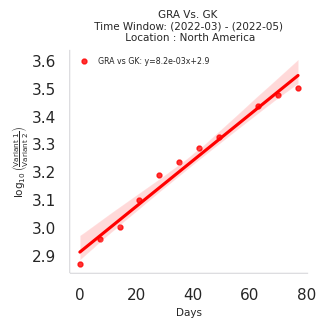

In [29]:
scatterplot('North America', df_weekly_sum, start = '2022-03', end = '2022-05', variants = ['GK'])

['2021-12']
[('South America', 0.05540998420742064)]
r-squared value: 0.9943934984549478
p-value: 0.0028071909


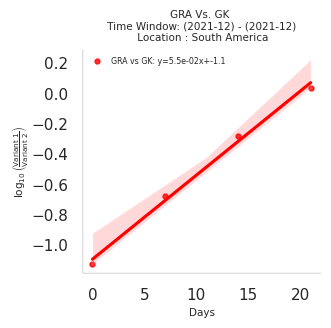

In [30]:
scatterplot('South America', df_weekly_sum, start = '2021-12', end = '2021-12', variants = ['GK'])

['2022-02', '2022-03']
[('Europe', 0.009914884959436283)]
r-squared value: 0.9509273121226399
p-value: 0.0000376295


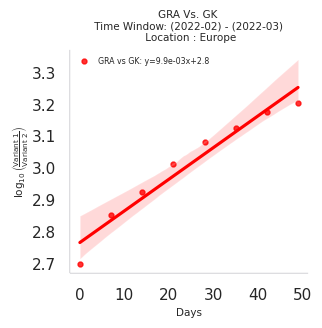

In [31]:
scatterplot('Europe', df_weekly_sum, start = '2022-02', end = '2022-03', variants = ['GK'])

['2022-01', '2022-02', '2022-03', '2022-04']
[('Oceania', 0.006391809718537095)]
r-squared value: 0.9855861291294137
p-value: 0.0000000000


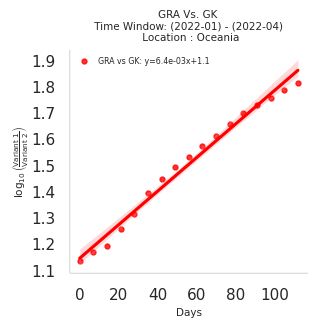

In [32]:
scatterplot('Oceania', df_weekly_sum, start = '2022-01', end = '2022-04', variants = ['GK'])

['2021-12']
[('Asia', 0.05767270706144408)]
r-squared value: 0.9996495230499465
p-value: 0.0001752538


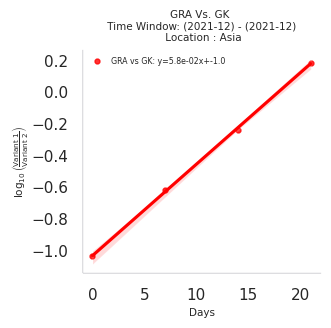

In [33]:
scatterplot('Asia', df_weekly_sum, start = '2021-12', end = '2021-12', variants = ['GK'])

['2021-11', '2021-12']
[('Africa', 0.03518251513362426)]
r-squared value: 0.9261232766670818
p-value: 0.0000328541


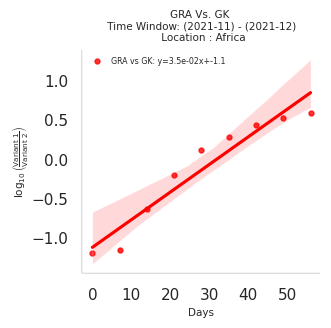

In [34]:
scatterplot('Africa', df_weekly_sum, start = '2021-11', end = '2021-12', variants = ['GK'])

# `Bar Plot` of the slope values in diffeerent `Continents`

In [36]:
slope_values_of_continents = pd.read_csv('gra_Vs_gk_slope_values_continents.csv')
print(slope_values_of_continents)

        Location     Slope
0  North America  0.008249
1  South America  0.055410
2         Europe  0.009915
3        Oceania  0.006392
4           Asia  0.057673
5         Africa  0.035183


In [37]:
slope_values_of_continents = slope_values_of_continents.drop_duplicates()
print(slope_values_of_continents.describe())
print("\n")

# Find the minimum and maximum slope values
min_slope_value = slope_values_of_continents['Slope'].min()
max_slope_value = slope_values_of_continents['Slope'].max()

# Find the corresponding countries for the minimum and maximum slope values
min_slope_continents = slope_values_of_continents[slope_values_of_continents['Slope'] == min_slope_value]['Location']
max_slope_continents = slope_values_of_continents[slope_values_of_continents['Slope'] == max_slope_value]['Location']

# Print the results
print(f"Min Slope Value: {min_slope_value}")
print(f"Country: {', '.join(min_slope_continents)}")
print("\n")
print(f"Max Slope Value: {max_slope_value}")
print(f"Country: {', '.join(max_slope_continents)}")
print("\n")
print(f"Average Slope Value: {slope_values_of_continents['Slope'].mean()}")


          Slope
count  6.000000
mean   0.028804
std    0.023931
min    0.006392
25%    0.008666
50%    0.022549
75%    0.050353
max    0.057673


Min Slope Value: 0.006391809718537
Country: Oceania


Max Slope Value: 0.057672707061444
Country: Asia


Average Slope Value: 0.02880351837014743


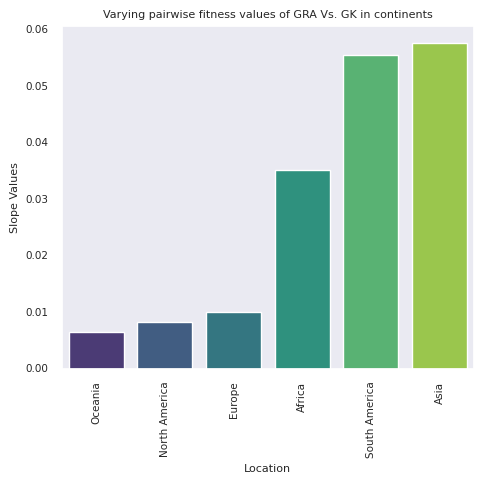

In [38]:
# Sort the DataFrame by 'Slope' column in ascending order
slope_values_of_continents = slope_values_of_continents.sort_values('Slope', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(slope_values_of_continents))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(5, 5))
sns.barplot(x='Location', y='Slope', data=slope_values_of_continents, palette=color_palette)
plt.xlabel('Location', fontsize = 8)
plt.ylabel('Slope Values', fontsize =8)
plt.title('Varying pairwise fitness values of GRA Vs. GK in continents', fontsize = 8)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Specify the directory path
directory = "/scr/mjpantho/Pantho_differential_fitness/gra_vs_gk_regression_plots/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "continents_bar_plot_gra_vs_gk.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

# Display the figure
plt.show()
